# Quantum Programming: Single Qubits

This code is meant to be used with the book.  The chapter should be in the same directory.  You will need the learn_quantum.py library and Qiskit.  

This material assumes you know the basics of python programming and Qiskit.  Qiskit is used here because it has an easy interface to access the transformation matrix.  

You can read the documentation on how to install and use [Qiskit](https://qiskit.org/documentation/terra/summary_of_quantum_operations.html#u-gates).

This goal of this material is to cover concepts used in quantum programming -- not to be a lesson in linear alegbra nor to provide a tutorial on Qiskit or any other library.  You can review basic information on the linear algebra of quantum computing from [Microsoft](https://docs.microsoft.com/en-us/quantum/concepts/vectors-and-matrices?view=qsharp-preview).  


In [1]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization.bloch import Bloch
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import learn_quantum as lq
from learn_quantum import ket, bra, np_array_to_latex as a_to_l, show_array, show_me_the_matrix
from IPython.display import Latex
import numpy as np
from math import pi as π, pi, sqrt


## Single Qubits and the Standard Basis

The examples present the information in Latex using various support functions in the 'learn_quantum' library. By default, rounded brackets are used. If you prefer square brackets, set lq.default_bracket_type = 'b'.

Other common paramaters are factor_out and label which are demonstrated in these exercises.  

Above, np_array_to_latex is setup with an alias of a_to_l.  "llf" is for Latex Line Feed and is used to put multiple expressions in a single output. 

In [2]:
Latex(a_to_l(ket('0')) + lq.llf + lq.np_array_to_latex(ket('1')))

<IPython.core.display.Latex object>

In [3]:
lq.default_bracket_type = 'b'
Latex(a_to_l(ket('+')) + lq.llf + a_to_l(ket('-'), factor_out=False))

<IPython.core.display.Latex object>

In [4]:
lq.default_bracket_type = 'p'

____
## Single Qubit Transformations in Bra-Ket

All quantum programming amounts to matrix manipulation of an initial state by a transformation matrix.  This is represented as $\vert \psi'\rangle = U\vert \psi\rangle$. Where $U$ is a [unitary matrix](https://en.wikipedia.org/wiki/Unitary_matrix). 

Quantum gates are basic unitary matricies that map one state onto another.  One way to view these gates is using the bra-ket notation to "project" an initial state onto a new state.



### X Gate

The X Gate can be constructed using ket and bra "projections."  The gate transforms 0 to 1 and 1 to 0.  Also known as the Not Gate.  But please see the discussion in the text about how a "Not" gate does not always perform a "Not" function.  In learning quantum programming, it is important to note that names given to various gates serve primmarily to identify the gate by its action on a non-quantum (classical) state.  This is suffcient for a basic understanding in this first chapter, but when acting on quantum states, the gate will not act in a classical manner. 

\begin{equation*} X=\vert 0\rangle \langle 1 \vert   +   \vert 1\rangle \langle 0 \vert = 
\end{equation*}

\begin{equation*}
\begin{pmatrix}1&0\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} + 
\begin{pmatrix}0&1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = 
\end{equation*}

\begin{equation*}
\begin{pmatrix}0&1\\0&0\end{pmatrix} + \begin{pmatrix}0&0\\1&0\end{pmatrix} = \begin{pmatrix}0&1\\1&0\end{pmatrix}
\end{equation*}

Note that above, the Latex was being formated to put multiple arrays in a single cell.  Use show_array to display a single array.

In [15]:
Ux = ket('0')@bra('1') + ket('1')@bra('0')
show_array(Ux, label='X')

<IPython.core.display.Latex object>

In [16]:
# Multiply the X-Gate by an intial state of 0 give a new state of 1.  
show_array(Ux@ket('0'))

<IPython.core.display.Latex object>

In [17]:
# Multiply the X-Gate by an intial state of 1 give a new state of 0.  
show_array(Ux@ket('1'))

<IPython.core.display.Latex object>

_____
### Z Gate

The Z gate maps 0 onto 0 and 1 onto -1.  It is known as the "phase flip" gate.

\begin{equation*}
Z = 1\vert 0\rangle \langle 0 \vert   - 1 \vert 1\rangle \langle 1 \vert =
\end{equation*}

\begin{equation*}
\begin{pmatrix}1&0\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} - 
\begin{pmatrix}0&1\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = 
\end{equation*}

\begin{equation*}
\begin{pmatrix}1&0\\0&0\end{pmatrix} - \begin{pmatrix}0&0\\0&1\end{pmatrix} = \begin{pmatrix}1&0\\0&-1\end{pmatrix}
\end{equation*}


In [18]:
U = ket('0')@bra('0') - ket('1')@bra('1')
show_array(U, label='Z')

<IPython.core.display.Latex object>

### Y Gate

The Y gate is represented in some texts as $Y = \begin{pmatrix}0&-1\\1&0\end{pmatrix}$ and is known as the bit and phase flip.  It is a combination of the X and Z gates. However, it is also frequently represented with an imaginary component. Either gate is the same gates up to the global phase -- that is, there is no computational difference between the gates and their entries differ by a common global factor.  See the text for detailed discussion of the global phase and how it is used to apply asthetics to certain matricies.  That is, you want a matrix to look a certain way to present it in literature, so a global phase is applied.  For computation purposes the matricies with 1/-1 and i/-i are identical. 

The Y gate transforms $\vert 0\rangle$ onto $\vert 1\rangle$ with an amplitude of $\sqrt{1} = -i$ and $\vert 1\rangle$ onto $\vert 0\rangle$ with amplitude $\sqrt{-1} = i$.  In bra-ket notation, and factoring out the coefficient to the front of the term, this is:

\begin{equation*}
Y = -i\vert 0\rangle \langle 1 \vert   + i \vert 1\rangle \langle 0 \vert =
\end{equation*}

\begin{equation*}
\begin{pmatrix}0&-i\\0&0\end{pmatrix} + \begin{pmatrix}0&0\\i&0\end{pmatrix} =
\begin{pmatrix}0&-i\\i&0\end{pmatrix}
\end{equation*}


In [19]:
U = -lq.imag*ket('0')@bra('1') + lq.imag*ket('1')@bra('0')
show_array(U, label='Y')

<IPython.core.display.Latex object>

In [20]:
## Applly a global phase if you want the other form.  See text for discussion of global phase
show_array(-lq.imag * U, label='Y')

<IPython.core.display.Latex object>

In [21]:
## Which is the same as X@Z
show_array(lq.pauliX@lq.pauliZ)

<IPython.core.display.Latex object>

In [22]:
## And a pi rotation on Y is the same
qr = QuantumRegister(1)
circuit = QuantumCircuit(qr)
circuit.ry(pi, qr)
show_me_the_matrix(circuit, label='Y')

<IPython.core.display.Latex object>

### Hadamard Gate

To transform an input of $\vert0\rangle$ onto either $\vert0\rangle$ or $\vert1\rangle$ with 50/50 probabilities, the values of a and b would be $\frac{1}{\sqrt{2}}$, as the sum of squares of these probabilities must equal one.  And to transform an input value of $\vert1\rangle$ on $\vert0\rangle$ or $\vert1\rangle$ with 50/50 probabilities, the values of c and d would also be $\frac{1}{\sqrt{2}}$.  Here, we will apply a "relative phase" of -1 to d to keep the matrix unitary, with an explanation of what they means coming later. The transformation is:
\begin{equation*}
 \frac{1}{\sqrt{2}}\vert 0 \rangle \langle 0 \vert + \frac{1}{\sqrt{2}}\vert 0 \rangle \langle 1 \vert + \frac{1}{\sqrt{2}}\vert 0 \rangle \langle 0 \vert - \frac{1}{\sqrt{2}} \vert 0 \rangle\langle 1 \vert =
 \end{equation*}
\begin{equation*}
 \begin{pmatrix}\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}&-\frac{1}{\sqrt{2}}\end{pmatrix} =
 \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 
1 & -1 \\ 
\end{pmatrix}
\end{equation*}

In [23]:
show_array(
    1/sqrt(2) * ket('0')@bra('0') + 1/sqrt(2) * ket('0')@bra('1') 
+ 1/sqrt(2) * ket('1')@bra('0') - 1/sqrt(2) * ket('1')@bra('1'))

<IPython.core.display.Latex object>

___
## Visual Representation of a Qubit

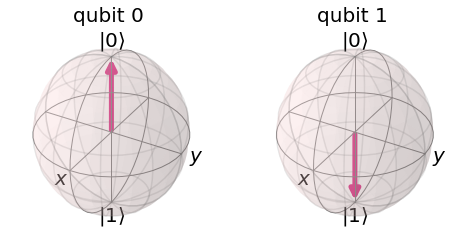

In [24]:
bloch1 = QuantumCircuit(2)
bloch1.x(1)
plot_bloch_multivector(lq.execute_state_vector(bloch1))

You can also step through a rotation to see how the rotation is performed. 

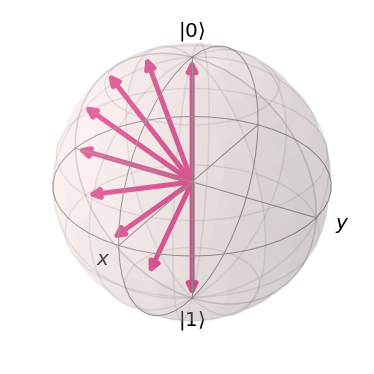

In [20]:
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)

vectors = []
vectors.append(lq.get_bloch_vectors(qc)[0])
for k in range(8):
    qc.rx(π/8, qr[0])
    vectors.append(lq.get_bloch_vectors(qc)[0])

sphere = Bloch()
sphere.vector_color = ['#dc267f']
sphere.add_vectors(vectors)
sphere.render()

____
## Single qubits in superposition

In [25]:
circuit = QuantumCircuit(1)
circuit.rx(π/2, 0)
lq.show_state_vector(circuit)

<IPython.core.display.Latex object>

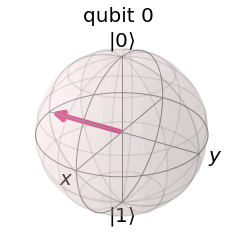

In [26]:
plot_bloch_multivector(lq.execute_state_vector(circuit))

In [27]:
lq.show_state_vector(circuit, show_zeros=True)

<IPython.core.display.Latex object>

In [28]:
lq.show_bloch_angles(circuit)

<IPython.core.display.Latex object>

## Eigenvectors

Eigenvectors are discussed in the Appendix on eignevectors for discrete systems, but this is not to understate their importance.  Eigenvectors are the same thing as "quantum states," with an Eigenvector being the mathematical representation for an Eignstate or quantum state.  That is, any quantum system can be measured in a finite set of states.  Those states are the Eigenstates for the system.  A state can be in a superposition of Eigenstates, but when measured can only a be in single Eigenstate.  This is commonly referred to as "collapsing" -- a word that confuses the issue more than it explains or describes.   

Here, Eigenvectors as just introduced without much explanation.  We will return to various Eigenvectors, Eigenvalues, Eignephases, and various other "eigen" properties of quantum systems throughout the book. All of quantum programming is manipulating a system to transition from one Eigenstate to another until it finally reaches the Eigenstate you want with a high degree of probability. 

Qiskit only measures in the computational basis, which means that any final output will be Eigenvectors of the standard basis. Typically, this is handled by rotating the state into the basis you wish to measure in and the conducting a measurement in the standard basis.

This entire book is about how to manipulate Eigenstates within a quantum computer. The formal mathematics will be used where approriate, but if you really wish to understand quantum programming, a thorough understanding of Eigenvectors is essential. 

In [29]:
circuit = QuantumCircuit(1)
lq.show_eigens(circuit)

<IPython.core.display.Latex object>

## Measurement

You can measure in other basis by performing a rotation into that basis and conducting a measumrent.  The X basis is measured by performing a Hadamared transformation and the Y basis is measured by performing a $S^\dagger$ and Hadamard.  

Because the standard (Z) bases is definite, the other two are completely random. 

Note that the "measureZ" variable does not do anything.  It is not necessary for this example to work, but is put in to illustrate the three different measruements. 

In [30]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

## Put the qubit in the 1 state in the standard basis (Z), 
# then measure it in the X, Y, Z
base = QuantumCircuit(qr, cr)
base.x(qr[0])

measureZ = QuantumCircuit(qr, cr)

measureX = QuantumCircuit(qr, cr)
measureX.h(qr[0])

measureY = QuantumCircuit(qr, cr)
measureY.sdg(qr[0])
measureY.h(qr[0])

m = QuantumCircuit(qr, cr)
m.measure(qr, cr)

shots = 1000
answers = lq.execute_simulated(base+measureX + m ,shots)
lq.print_reverse_results(answers, label='X')

answers = lq.execute_simulated(base + measureY + m ,shots)
lq.print_reverse_results(answers, label='Y')

answers = lq.execute_simulated(base + measureZ + m ,shots)
lq.print_reverse_results(answers, label='Z')

Reversed:X: [('0', 499), ('1', 501)]
Reversed:Y: [('0', 509), ('1', 491)]
Reversed:Z: [('1', 1000)]


### Measurement support functions

Measurement across various axes is such a common tool for understanding small scale quantum systems that the library has some tools to make the task simple.  The following is identical to above code block:


In [31]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

## Put the qubit in the 1 state in the standard basis (Z), 
# then measure it in the X, Y, Z
base = QuantumCircuit(qr, cr)
base.x(qr[0])

lq.print_measurements('XYZ', base, qr, cr, shots=1000)

Reversed:X: [('0', 509), ('1', 491)]
Reversed:Y: [('0', 506), ('1', 494)]
Reversed:Z: [('1', 1000)]


## Basic superposition

The following sets up a basic superposition.  The factor=False prevents the $\frac{1}{\sqrt{2}}$ from being factored out.  Depending on which aspects of the system you are looking at, sometimes it is easier to see relationships when the terms are factored out.  Other times, it is easier without the factoring.

In [32]:
circuit = QuantumCircuit(1,1)
circuit.rx(π/2, 0)
lq.show_state_vector(circuit, factor_out=False, label='\psi_{Rx}')

<IPython.core.display.Latex object>

And you can "colapse" the state vector.

In [33]:
circuit.rx(-π/2, 0)
lq.show_state_vector(circuit, label='\psi_{Rx-Rx}')

<IPython.core.display.Latex object>

____
When you want to perform a measruement on a circuit but also wish to evaluate the transformation matrix or some sub-part of it, split the circuit into multiple parts.  Here, the measurement is split off so that we can evalute the circuit in its state prior to the measruement. 

Note that if we are not passing the registers to any functions, you can leave off the QuantumRegister and ClassicalRegister declarations and just reference their indicies.

In [34]:
circuit = QuantumCircuit(1,1)
m = QuantumCircuit(1,1)
circuit.rx(π/2, 0)
m.measure(0,0)
lq.show_state_vector(circuit + m, label='\psi_{Meas}')

<IPython.core.display.Latex object>

In [35]:
lq.show_eigens(circuit)

<IPython.core.display.Latex object>

____
## Gate Composition

Gates are matricies and circuits, which are sequences of gates, a just matricies multiplied together.  However, the prior state vector is on the right, so the gates are applied in "reverse" order -- that is, from right-to-left.  The following is the general formula for the decomposition of any unitary matrix:

\begin{equation*}
    e^{i\alpha} 
    \begin{pmatrix} e^{-i\beta/2} & 0 \\ 
                0 & e^{i\beta/2}\end{pmatrix}
    \begin{pmatrix} \cos{\frac{\gamma}{2}} & -\sin{\frac{\gamma}{2}} \\
    \sin{\frac{\gamma}{2}} & \cos{\frac{\gamma}{2}} \end{pmatrix}
    \begin{pmatrix}e^{-i\delta/2} & 0 \\
    0 & e^{i\delta/2} \end{pmatrix}
\end{equation*}

When working on constructing matricies, you can perform the multiplaction directly using numpy arrays or you can let Qiskit do it for you. Note that matricies are applied from right-to-left:

In [36]:
show_array(lq.pauliX@lq.pauliY@lq.hadamard)

<IPython.core.display.Latex object>

In [37]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.y(0)
circuit.x(0)
show_me_the_matrix(circuit)

<IPython.core.display.Latex object>

In [26]:
lq.show_state_vector(circuit, factor_out=False)

<IPython.core.display.Latex object>

In [38]:
show_array(lq.what_is_the_state_vector(circuit), factor_out=False)

<IPython.core.display.Latex object>

___________
The state vector is just the transformation matrix multiplied by the existing state vector.  For a newly intialized qubit, that is just ket('0')

In [39]:
show_array(lq.pauliX@lq.pauliY@lq.hadamard@ket('0'), factor_out=False)

<IPython.core.display.Latex object>

# Exponential view

When composing gates, it can be helpful to view the matrices as exponents.

In [40]:
show_array(lq.pauliX@lq.pauliY@lq.hadamard, display_exp=True)

<IPython.core.display.Latex object>

In [41]:
circuit = QuantumCircuit(1)
circuit.s(0)
show_me_the_matrix(circuit, display_exp=True)

<IPython.core.display.Latex object>

In [42]:
circuit = QuantumCircuit(1)
circuit.t(0)
show_me_the_matrix(circuit, display_exp=True)

<IPython.core.display.Latex object>

# Hadamard as Fourier Transformation

The [Quantum Fourier Transformation](https://en.wikipedia.org/wiki/Quantum_Fourier_transform) will be used extensively and it is useful to think of the Hadamard gate as a 2x2 Fourier Tranformation.  The properties and uses of the Quantum Fourier Transforation will be covered in detail in the coming chapters, but it is useful to identify it as a simple case of the QFT rather than as the "superposition" gate.  Viewing it as an exponential makes this concept clear.

In [43]:
circuit = QuantumCircuit(1)
circuit.h(0)
show_me_the_matrix(circuit, display_exp=True)

<IPython.core.display.Latex object>

You should also look at the eigenvectors of the Pauli-X matrix -- which are the columns of the Hadamard transformation.  This is not a conincidence and will be explored in the section on the Quantum Fourier Transformation.

In [70]:
lq.show_eigens(lq.pauliX)

<IPython.core.display.Latex object>

In [71]:
show_array(lq.hadamard)

<IPython.core.display.Latex object>

## Mechanical Composition

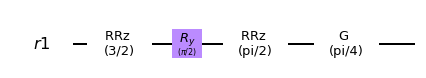

In [44]:
qr = QuantumRegister(1,'r1') ## Apply a label to identify in the circuit diagram
custom = QuantumCircuit(qr)

alpha = π/4
beta = π/2
gamma = π/2
delta = -π/2

custom.append(lq.rrz_gate(delta), [qr[0]])
custom.ry(gamma, qr[0])
custom.append(lq.rrz_gate(beta), [qr[0]])
custom.append(lq.global_gate(alpha), [qr[0]])

custom.draw(output='mpl')

## Relative Phase

In [3]:
qc = QuantumCircuit(1)
qc.s(0)
lq.show_me_the_matrix(qc, display_exp=True)

<IPython.core.display.Latex object>

In [4]:
qc = QuantumCircuit(1)
qc.t(0)
lq.show_me_the_matrix(qc, display_exp=True)

<IPython.core.display.Latex object>

In [5]:
qc = QuantumCircuit(1)
qc.u1(π/8, 0)
lq.show_me_the_matrix(qc, display_exp=True)

<IPython.core.display.Latex object>

## Exercise 1

In [45]:
u = sqrt(3/4)*ket('0')@bra('0') \
    - sqrt(1/4)*ket('0')@bra('1') \
    + sqrt(1/4)*ket('1')@bra('0') \
    + sqrt(3/4)*ket('1')@bra('1')

lq.decompose_single(u)


alpha= 0, beta= 0, gamma= pi/3, delta=0


In [46]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.ry(π/3, qr[0])
m = QuantumCircuit(qr, cr)
m.measure(qr, cr)
answers = lq.execute_simulated(circuit+m ,1000, 
                              seed_simulator=12345)
lq.print_reverse_results(answers)

Reversed: [('0', 746), ('1', 254)]


## Exercise 2
In this exercies, the negative sign is moved to the last term.  You can verify this still gives the same probability distribution when measured in the standard basis.  But it gives a very different probability distributions from the Ry rotation when they are both measured in the Hadamard basis.  This is because the "relative phase" of the systems is different -- in this case opposite.  When the system is rotated into a basis that reflects that phase, the results  will be different (in this case opposite). 

Here, the system in Exercise 1 was under specified.  In our initial setup, the only requirment was a single axis measurement split 75/25.  This gave several options for how to handle the phase --- none of which affected the outcome of the simple exercies.  For most quantum programs, the phase is a major component of the computation and it needs to be properly defined.

This exerise introduces lq.decompose_single_qiskit(u) -- which decomposes a single qubit matrix into a single U3 gate.  The decompose_single function would work as well, but would requipe multiple gates.  To keep the example as simple as possible, it is easier to use the qiskit single gate decomposition. 

In [47]:
u = sqrt(3/4)*ket('0')@bra('0')  \
    + sqrt(1/4)*ket('0')@bra('1') \
    + sqrt(1/4)*ket('1')@bra('0') \
    - sqrt(3/4)*ket('1')@bra('1')

lq.decompose_single_qiskit(u)

theta= pi/3, phi= 0, lambda= pi, phase=0


In [48]:
qc = QuantumCircuit(1)
qc.u3(π/3,0, π, 0)
show_me_the_matrix(qc, label='U3(\pi/3,0,\pi)')

<IPython.core.display.Latex object>

In [49]:
qc = QuantumCircuit(1)
qc.ry(π/3, 0)
show_me_the_matrix(qc, label='R_y')

<IPython.core.display.Latex object>

In [50]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
rel_phase = QuantumCircuit(qr, cr)
rel_phase.u3(-pi/3,0, pi, qr[0])
rel_phase.h(qr[0])

m_rel = QuantumCircuit(qr , cr)
m_rel.measure(qr[0], cr[0])

answers = lq.execute_simulated(rel_phase + m_rel ,1000, 
                              seed_simulator=12345)
lq.print_reverse_results(answers)

Reversed: [('0', 66), ('1', 934)]


In [51]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
initial_ry = QuantumCircuit(qr, cr)
initial_ry.ry(π/3, qr[0])
initial_ry.h(qr[0])

m_ry = QuantumCircuit(qr , cr)
m_ry.measure(qr[0], cr[0])

answers = lq.execute_simulated(initial_ry + m_ry ,1000, 
                              seed_simulator=12345)
lq.print_reverse_results(answers)

Reversed: [('0', 945), ('1', 55)]


In [52]:
lq.show_state_vector(rel_phase, label='\psi_{u3}')

<IPython.core.display.Latex object>

In [53]:
lq.show_state_vector(initial_ry, label='\psi_{Ry}')

<IPython.core.display.Latex object>

## Exercise 3
See text, no code.

## Exercise 4

In [54]:
ket('0')@bra('+')  + ket('1')@bra('-')

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

## Exercise 5

In [55]:
lq.decompose_single(lq.hadamard)

alpha= pi/2, beta= 0, gamma= pi/2, delta=pi


In [12]:
circuit = QuantumCircuit(1)

circuit.rz(pi, 0)
circuit.ry(pi/2, 0)

show_me_the_matrix(circuit, label='Hadamard')

<IPython.core.display.Latex object>

In [57]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.draw()

In [58]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.decompose().draw()

## Exercise 6

In [59]:
qr = QuantumRegister(1)
circuit = QuantumCircuit(qr)
circuit.append(lq.global_gate(π/4), [qr[0]])
circuit.h(qr[0])
show_me_the_matrix(circuit, label='Hadamard')

<IPython.core.display.Latex object>

## Exercise 7

In [60]:
srn = np.array([[0.5+0.5j, 0.5-0.5j],
       [0.5-0.5j, 0.5+0.5j]])
lq.decompose_single(srn)

alpha= pi/4, beta= 3/2, gamma= pi/2, delta=pi/2


In [62]:
qr = QuantumRegister(1)
circuit = QuantumCircuit(qr)

alpha = π/4
beta = -π/2
gamma = π/2
delta = π/2

circuit.append(lq.rrz_gate(delta), [qr[0]])
circuit.ry(gamma, qr)
circuit.append(lq.rrz_gate(beta), [qr[0]])
circuit.append(lq.global_gate(π/4), [qr[0]])

show_me_the_matrix(circuit, label='\sqrt{NOT}')

<IPython.core.display.Latex object>

In [63]:
qc_srn = QuantumCircuit(1)
qc_srn.h(0)
qc_srn.s(0)
qc_srn.h(0)
show_me_the_matrix(qc_srn, label='\sqrt{NOT}')

<IPython.core.display.Latex object>

In [64]:
lq.decompose_single_qiskit(srn)

theta= pi/2, phi= 3/2, lambda= pi/2, phase=pi/4


In [65]:
from qiskit.quantum_info.operators import Operator

In [66]:
srn_gate = Operator(srn)
qr = QuantumRegister(1)
circ = QuantumCircuit(qr)
circ.append(srn_gate, [qr[0]])
print(circ.decompose().draw())


          ┌─────────────────────┐
q12_0: |0>┤ U3(pi/2,-pi/2,pi/2) ├
          └─────────────────────┘


In [68]:
qc_no_global = QuantumCircuit(1)
qc_no_global.u3(π/2, -π/2, π/2, 0)
show_me_the_matrix(qc_no_global, label='\sqrt{NOT}')


<IPython.core.display.Latex object>

In [69]:
# Compare the two matrices with ignore_phase
mat = lq.what_is_the_matrix(qc_srn)
mat2 = lq.what_is_the_matrix(qc_no_global)
from qiskit.quantum_info.operators.predicates import matrix_equal
matrix_equal(mat, mat2, ignore_phase=True)

True